# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Sumber Dataset : https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data yang lebih cantik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from google.colab import drive # Mount Google Drive
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Untuk normalisasi dan standarisasi
from sklearn.preprocessing import LabelEncoder # Untuk encoding
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
!pip install kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'anjuanjannah'
os.environ['KAGGLE_KEY'] = '4982a5f14b7d302a5428012eabca503e'

In [ ]:
import kaggle

kaggle.api.dataset_download_files('sebastianwillmann/beverage-sales', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales


In [ ]:
data = pd.read_csv('./data/beverage_sales_data.csv')

In [ ]:
data.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
5,ORD2,CUS2847,B2C,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.00,18.18,Schleswig-Holstein,2023-03-16
6,ORD3,CUS1806,B2B,Tomato Juice,Juices,2.14,44,0.10,84.74,Hamburg,2022-11-20
7,ORD3,CUS1806,B2B,Vittel,Water,0.43,13,0.05,5.31,Hamburg,2022-11-20
8,ORD3,CUS1806,B2B,San Pellegrino,Water,1.21,92,0.10,100.19,Hamburg,2022-11-20
9,ORD3,CUS1806,B2B,Evian,Water,1.38,3,0.05,3.93,Hamburg,2022-11-20


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print("\nInformasi Dataset:")
print(data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB
None


In [ ]:
data = data.sample(n=10000, random_state=69, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.5+ KB


In [ ]:
print("\nJumlah Baris dan Kolom:")
print(data.shape)
print("\nJenis Data pada Setiap Kolom:")
print(data.dtypes)


Jumlah Baris dan Kolom:
(10000, 11)

Jenis Data pada Setiap Kolom:
Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object


In [ ]:
print("\nData yang Hilang pada Setiap Kolom:")
missing_values = data.isnull().sum()
print(missing_values)


Data yang Hilang pada Setiap Kolom:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [ ]:
data.describe().apply(lambda x: x.apply('{0: .3f}'.format))

,Unit_Price,Quantity,Discount,Total_Price
count,10000.000,10000.000,10000.000,10000.000
mean,5.641,23.311,0.031,127.034
std,14.062,27.035,0.045,482.093
min,0.330,1.000,0.000,0.380
25%,1.060,6.000,0.000,8.460
50%,1.790,11.000,0.000,21.200
75%,3.150,31.000,0.050,70.263
max,144.470,100.000,0.150,10858.750


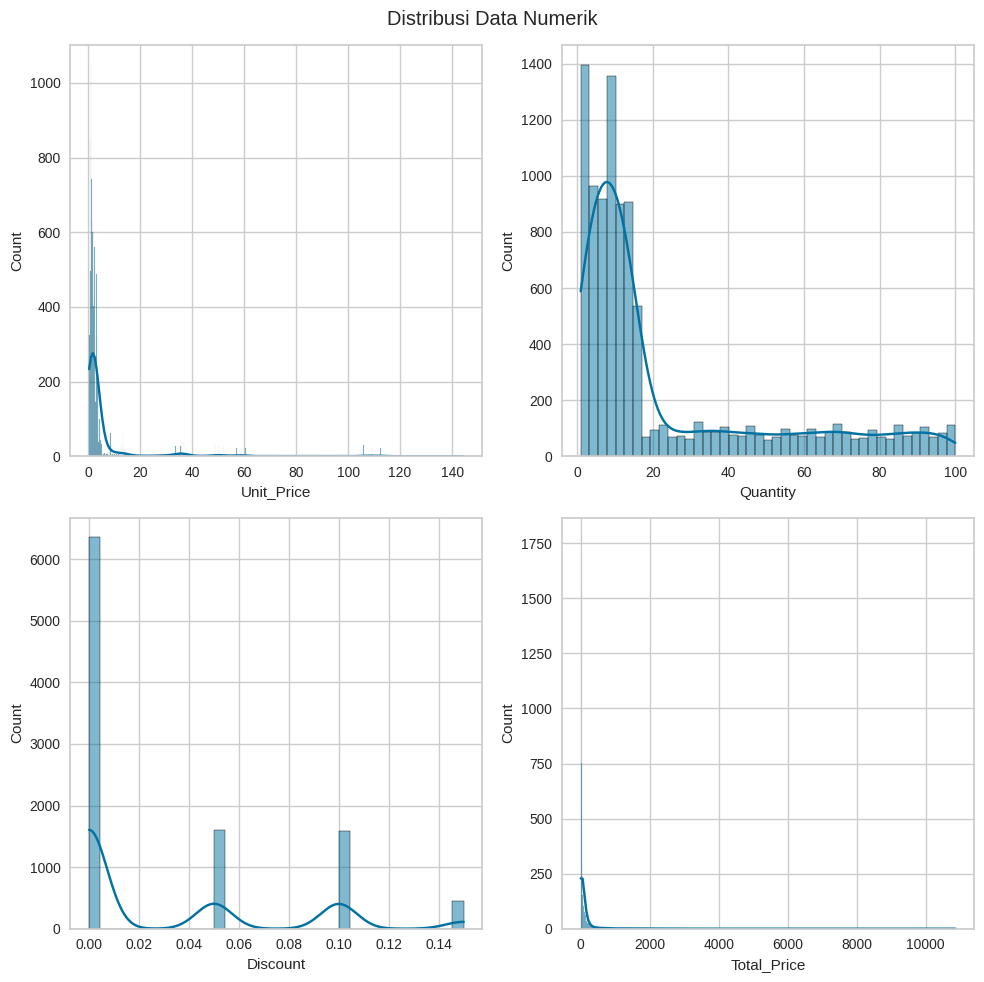

In [ ]:
# Mengambil nama kolom data numerik serta memvisualisasikan
numeric_columns = data.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], ax=axes[i//2, i%2], kde=True)
plt.suptitle("Distribusi Data Numerik")
plt.tight_layout()
plt.show()

In [ ]:
# Visualisasi Kolom Data Kategorikal
categorical_columns = ['Category','Customer_Type','Product','Region']

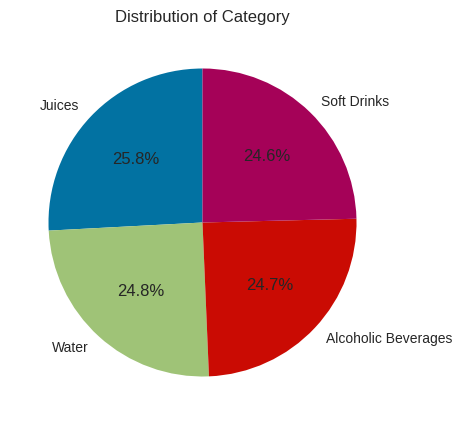

In [ ]:
category_count = data['Category'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Category')
plt.show()

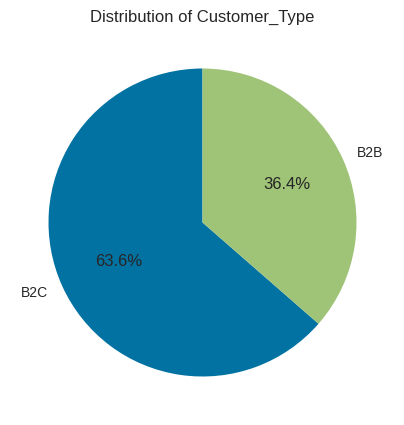

In [ ]:
customer_type_count = data['Customer_Type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(customer_type_count, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer_Type')
plt.show()

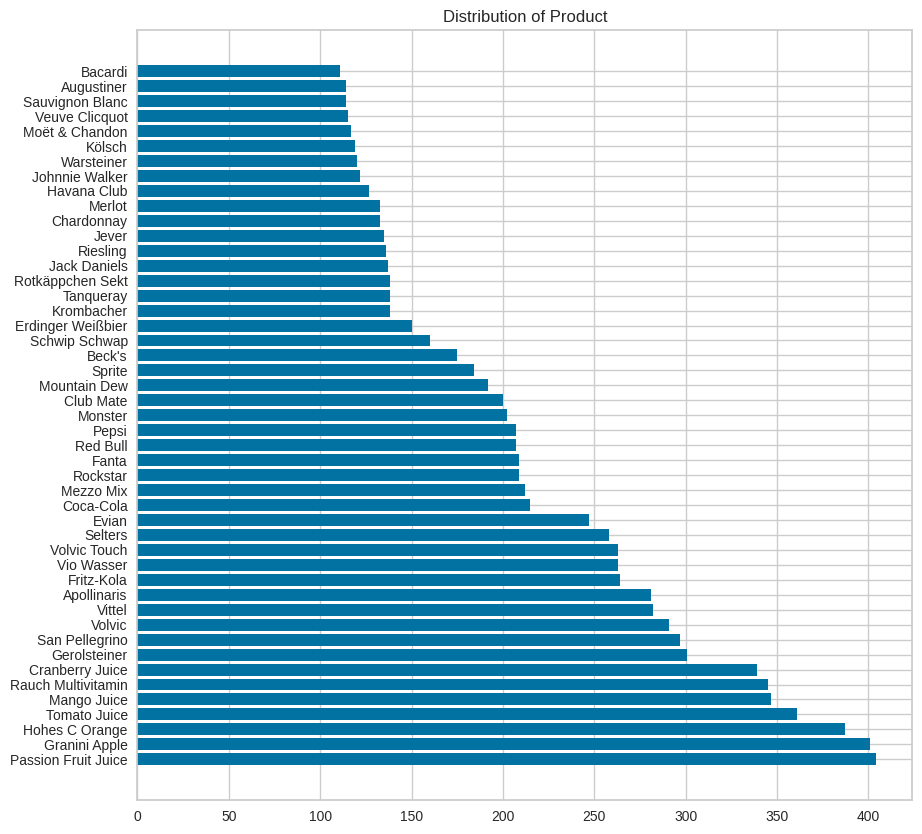

In [ ]:
product_count = data['Product'].value_counts()
plt.figure(figsize=(10, 10))
plt.barh(product_count.index, product_count.values)
plt.title('Distribution of Product')
plt.show()

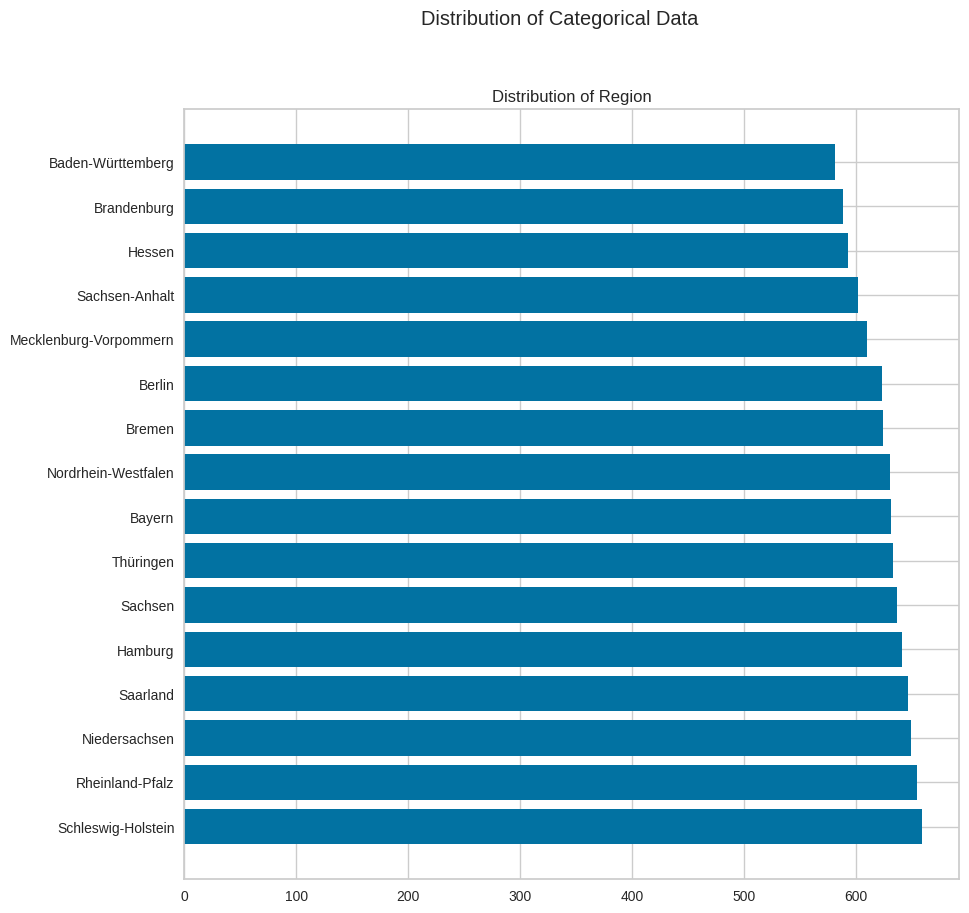

In [ ]:
region_count = data['Region'].value_counts()
plt.figure(figsize=(10, 10))
plt.barh(region_count.index, region_count.values)
plt.title('Distribution of Region')
plt.suptitle("Distribution of Categorical Data")
plt.show()

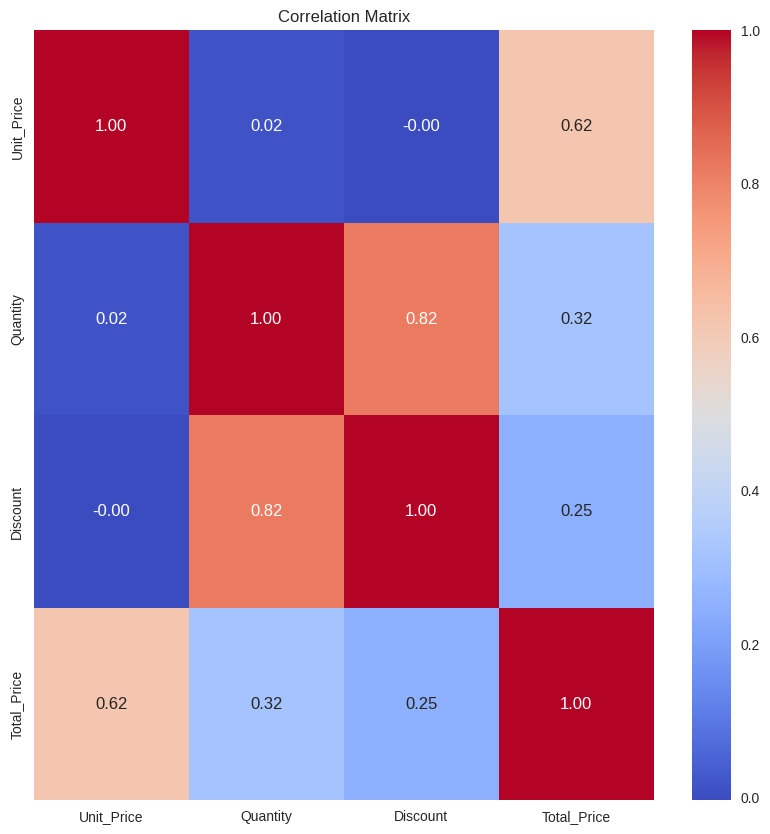

In [ ]:
plt.figure(figsize=(10, 10))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

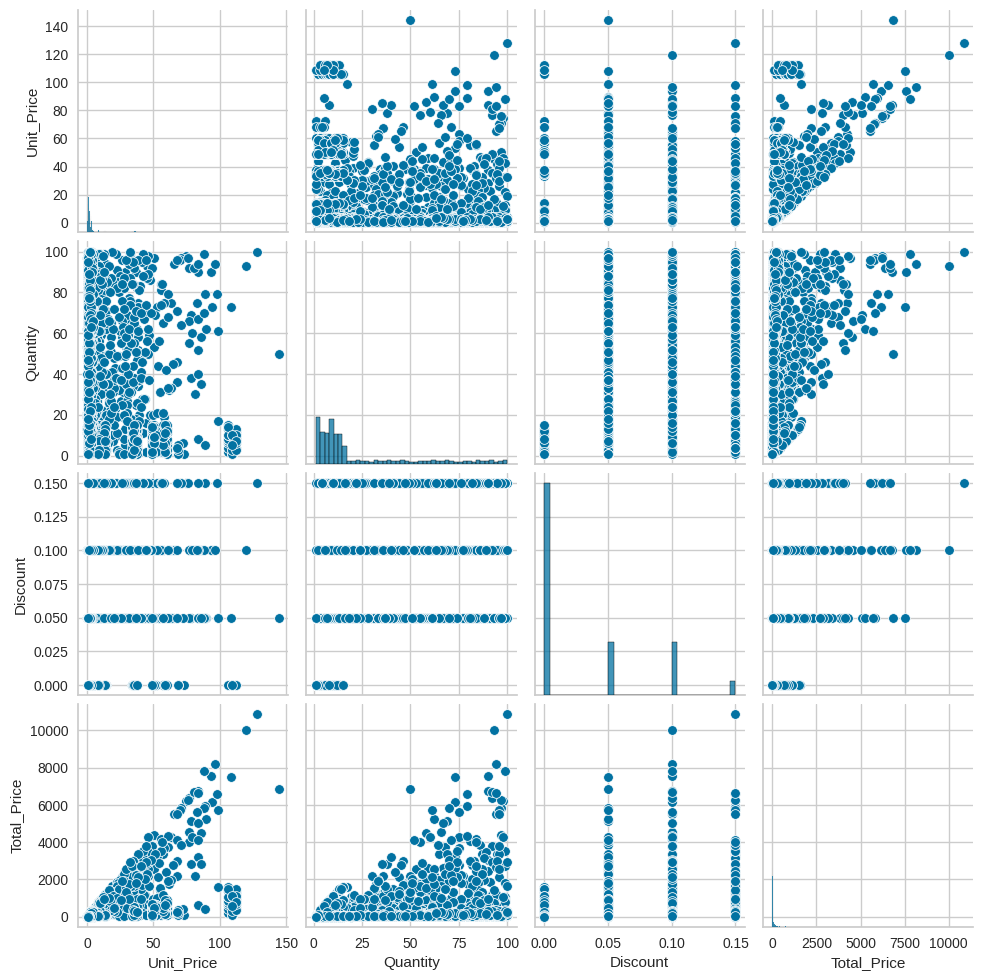

In [ ]:
sns.pairplot(data[numeric_columns])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
print("jumlah duplikat:", data.duplicated().sum())

jumlah duplikat: 0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
data_normalized = data.copy()
data_normalized[['Quantity']] = min_max_scaler.fit_transform(data_normalized[['Quantity']])
data_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28


In [ ]:
data_standardized = data_normalized.copy()
data_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(data_standardized[['Total_Price', 'Unit_Price']])
data_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.327230,0.060606,0.00,-0.248416,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.350698,0.454545,0.10,-0.202551,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.194952,0.727273,0.05,0.153664,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.210598,0.292929,0.05,-0.105075,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.336475,0.020202,0.00,-0.257854,Hessen,2023-04-28


In [ ]:
# Deteksi Outlier
Q1 = data_standardized[numeric_columns].quantile(0.25)
Q3 = data_standardized[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

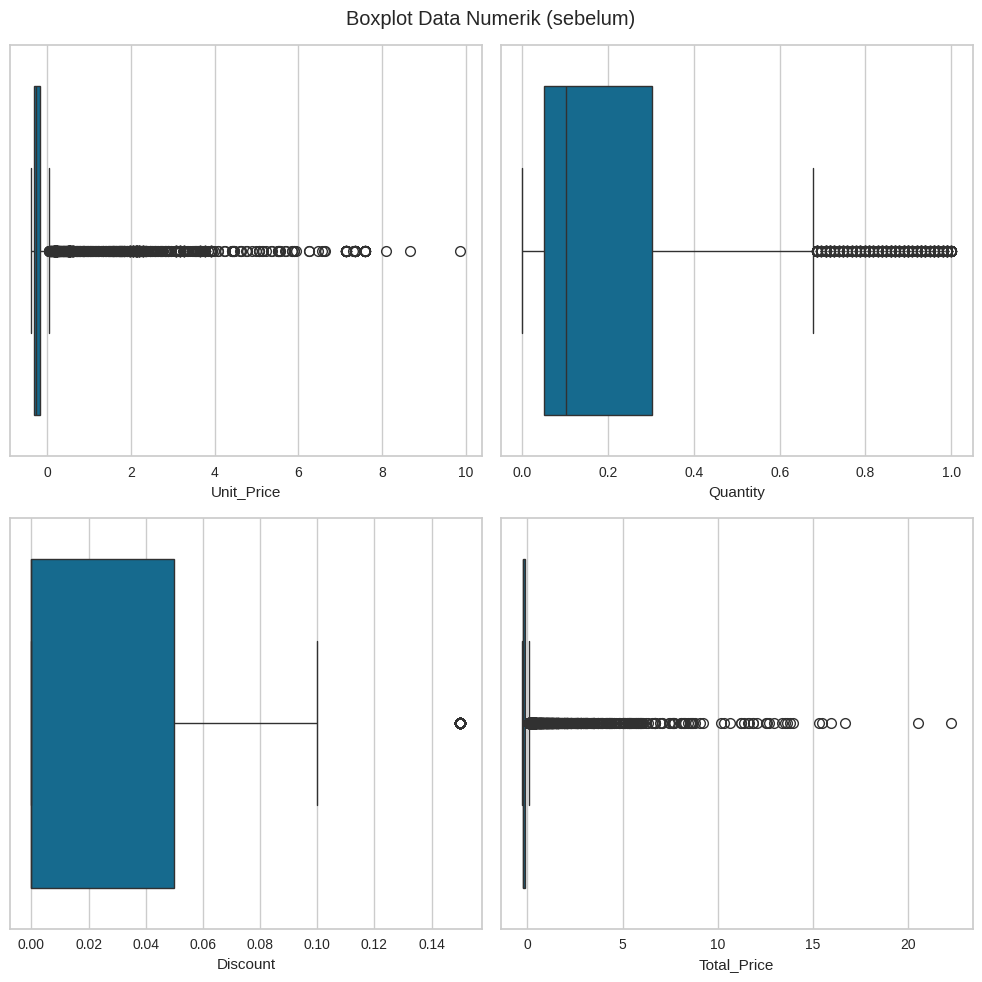

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data_standardized[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplot Data Numerik (sebelum)")
plt.tight_layout()
plt.show()

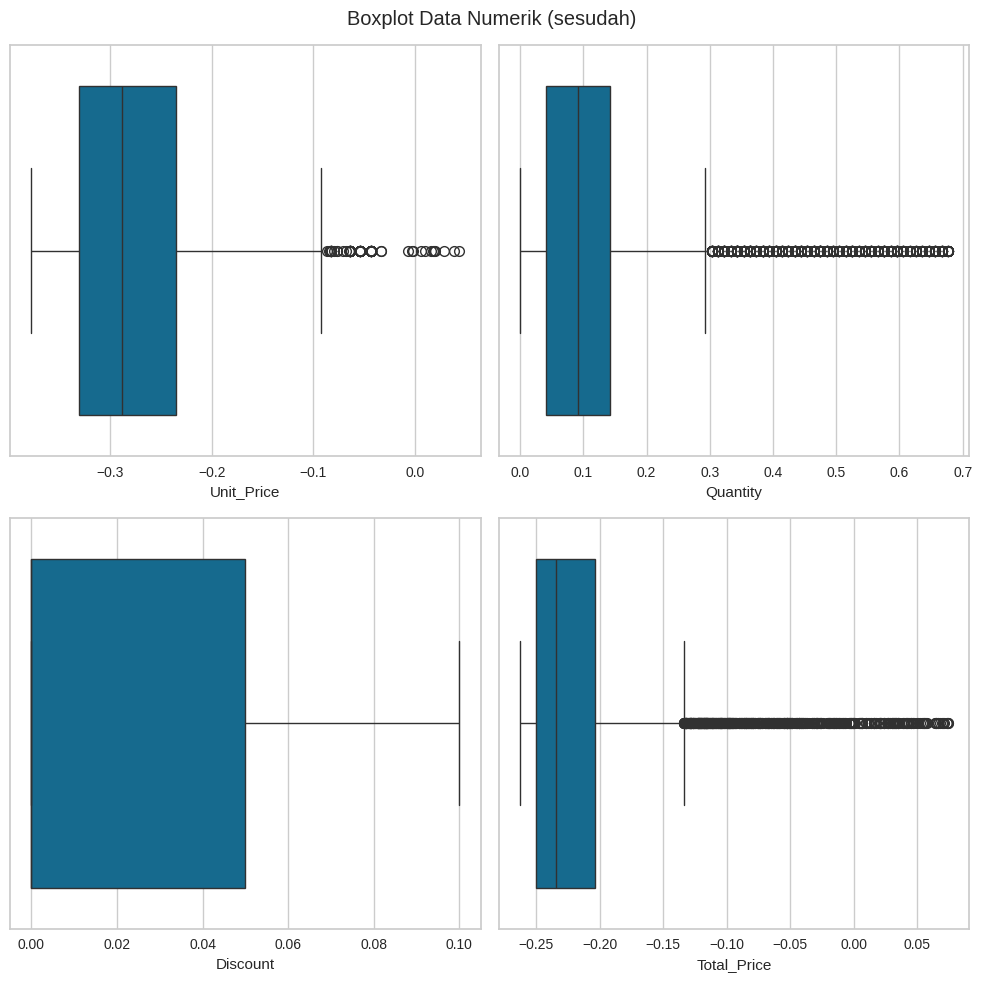

In [ ]:
# Penanganan Outlier
mask = ~((data_standardized[numeric_columns] < lower_bound) | (data_standardized[numeric_columns] > upper_bound)).any(axis=1)
data_cleaned = data_standardized[mask]

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data_cleaned[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplot Data Numerik (sesudah)")
plt.tight_layout()
plt.show()

In [ ]:
label_encoder = LabelEncoder()

data_labeled = data_cleaned.copy()

# Label encoding
data_labeled[['Category', 'Region', 'Product']] = data_cleaned[['Category', 'Region', 'Product']].apply(label_encoder.fit_transform)

# one-hot encoding
data_encoded = pd.get_dummies(data_labeled, columns=['Customer_Type'])
data_encoded.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD697566,CUS6363,5,2,-0.327230,0.060606,0.00,-0.248416,4,2021-02-17,False,True
1,ORD1118443,CUS7797,32,3,-0.350698,0.454545,0.10,-0.202551,13,2023-04-15,True,False
3,ORD1437128,CUS6393,20,2,-0.210598,0.292929,0.05,-0.105075,14,2021-09-07,True,False
4,ORD562794,CUS4090,29,3,-0.336475,0.020202,0.00,-0.257854,6,2023-04-28,False,True
5,ORD2320519,CUS5936,2,0,-0.300916,0.030303,0.00,-0.251818,4,2023-11-01,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# 1. Pilih fitur
features = ['Unit_Price', 'Quantity', 'Total_Price', 'Discount' , 'Customer_Type_B2B', 'Customer_Type_B2C']
X = data_encoded[features]
X

,Unit_Price,Quantity,Total_Price,Discount,Customer_Type_B2B,Customer_Type_B2C
0,-0.327230,0.060606,-0.248416,0.00,False,True
1,-0.350698,0.454545,-0.202551,0.10,True,False
3,-0.210598,0.292929,-0.105075,0.05,True,False
4,-0.336475,0.020202,-0.257854,0.00,False,True
5,-0.300916,0.030303,-0.251818,0.00,False,True
...,...,...,...,...,...,...
9994,-0.282426,0.393939,-0.138805,0.10,True,False
9996,-0.276737,0.141414,-0.209065,0.00,False,True
9997,-0.318696,0.000000,-0.261111,0.00,False,True
9998,-0.330074,0.171717,-0.228045,0.05,True,False


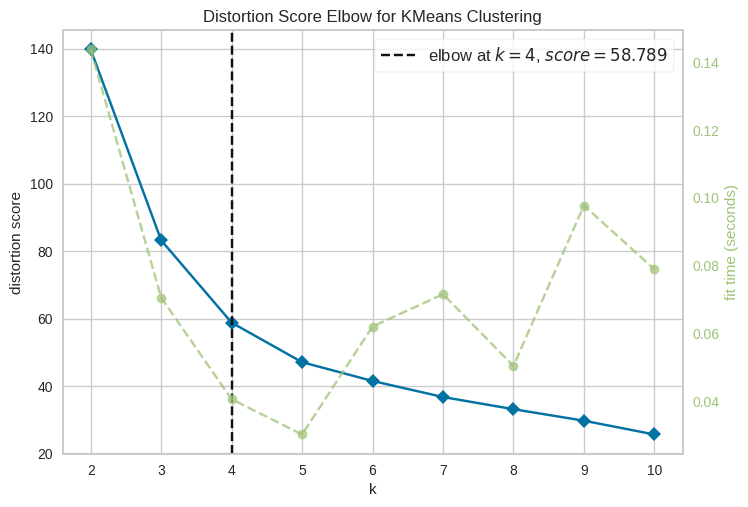

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Hitung Silhouette Score
sil_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score for K={visualizer.elbow_value_}: {sil_score}')

Silhouette Score for K=4: 0.37574133635590706


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

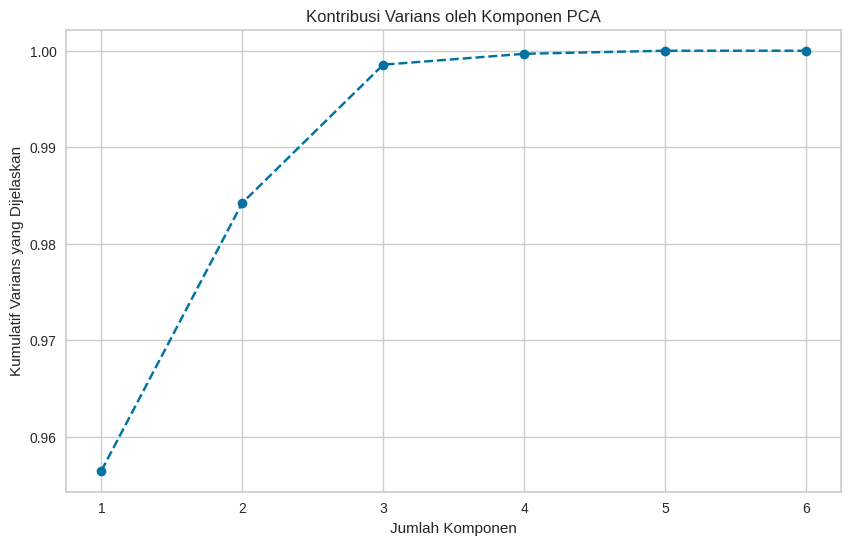

In [ ]:
from sklearn.decomposition import PCA

# Lakukan PCA untuk memahami kontribusi fitur
pca = PCA(n_components=len(features))
pca_data = pca.fit_transform(X)

# Plot kontribusi varians setiap komponen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Kontribusi Varians oleh Komponen PCA')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Kurangi dimensi data menjadi 2 dengan PCA agar mudah untuk memvisualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

# Calculate initial silhouette score and store it in silhouette_scores
silhouette_scores = [silhouette_score(X_pca, kmeans.labels_)]  # Store initial score

cluster_labels_reduced = kmeans.fit_predict(X_pca)  # Use kmeans instead of kmeans_reduced

# Hitung Silhouette Score untuk data hasil feature selection
silhouette_score_reduced = silhouette_score(X_pca, cluster_labels_reduced)
print(f"\nSilhouette Score dengan Feature Selection: {silhouette_score_reduced}")

# Bandingkan dengan Silhouette Score sebelumnya
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

# Jika Silhouette Score >= 0.55, simpan label klaster
if silhouette_score_reduced >= 0.55:
    valid_cluster_labels = cluster_labels_reduced
    print("Silhouette Score", silhouette_score_reduced, "disimpan")

    # Menyimpan hasil cluster ke dalam dataset
    data_encoded['Cluster'] = valid_cluster_labels # Use data_encoded instead of dataset
    print("Cluster labels disimpan ke dalam dataset.")

else:
    valid_cluster_labels = None
    print("Silhouette Score < 0.55 tidak disimpan.")

print(valid_cluster_labels)


Silhouette Score dengan Feature Selection: 0.8640782323246413
Silhouette Score Tanpa Feature Selection: 0.8640782323246413
Silhouette Score 0.8640782323246413 disimpan
Cluster labels disimpan ke dalam dataset.
[0 2 2 ... 0 3 0]


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

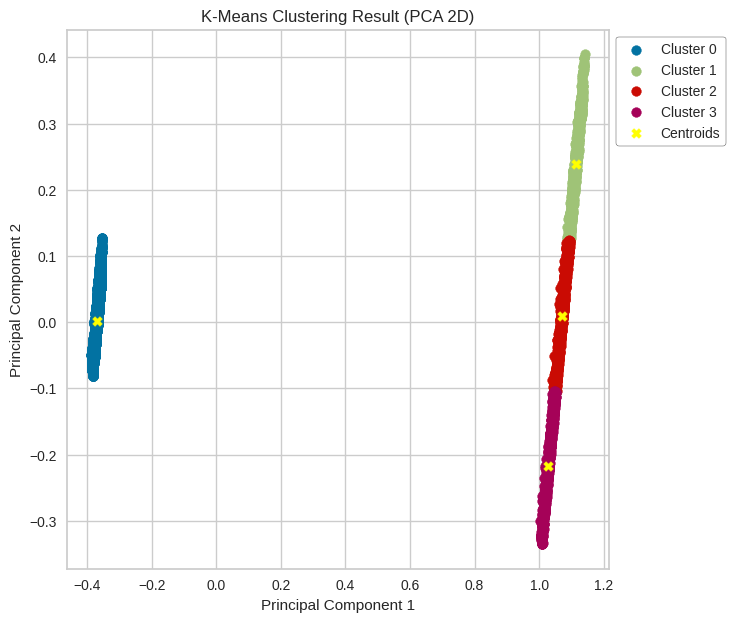

In [ ]:
# Visualize each cluster
plt.figure(figsize=(7, 7))
for i in range(4):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker='X', label='Centroids')
plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [ ]:
data_labeled = data_cleaned.copy()
data_labeled['Cluster'] = kmeans.labels_
data_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.327230,0.060606,0.00,-0.248416,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.350698,0.454545,0.10,-0.202551,Sachsen-Anhalt,2023-04-15,2
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.210598,0.292929,0.05,-0.105075,Schleswig-Holstein,2021-09-07,2
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.336475,0.020202,0.00,-0.257854,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.300916,0.030303,0.00,-0.251818,Bremen,2023-11-01,0


In [ ]:
# Mengembalikan data numerik menjadi semula
data_labeled[['Quantity']] = min_max_scaler.inverse_transform(data_labeled[['Quantity']])
data_labeled[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(data_labeled[['Total_Price', 'Unit_Price']])
data_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,2
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,2
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


Cluster
0    5630
3     708
2     683
1     564
Name: count, dtype: int64 



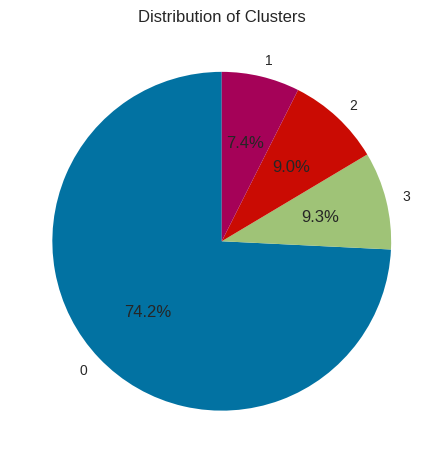

In [ ]:
# Menghitung dan memvisualisakan jumlah data per cluster
cluster_count = data_labeled['Cluster'].value_counts()
print(cluster_count,'\n')

plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()

In [ ]:
# Menghitung rata - rata per cluster
data_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.862075,7.930018,0.000000,14.835064
1,1.650957,55.735816,0.080319,82.849699
2,1.595608,33.802343,0.067350,48.117657
3,1.490113,11.871469,0.060169,15.443686


Customer_Type  B2B   B2C
Cluster                 
0                0  5630
1              564     0
2              683     0
3              708     0 



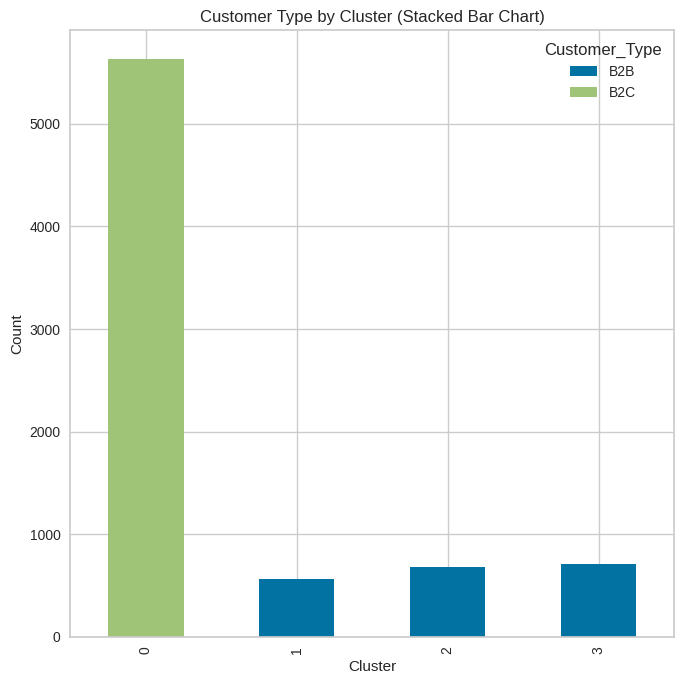

In [ ]:
# Menggelompokkan 'Cluster' dan 'Customer_Type' serta menghitung kemunculan datanya
customer_type_and_cluster_counts = data_labeled.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print(customer_type_and_cluster_counts,'\n')

# Visualisasi
customer_type_and_cluster_counts.plot(kind='bar', stacked=True, figsize=(7, 7))
plt.title('Customer Type by Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Average Price per Unit:** 1,86  
- **Average Purchase Quantity:** 7,93 unit
- **Average Discount:** 0%
- **Average Total Price:** 14,84
- **Customer Type:** B2C (Business to Consumer)  
- **Analisis:** Kelompok ini berfokus pada pelanggan yang membeli dalam jumlah kecil tanpa diskon, sehingga harga per unit menjadi lebih kompetitif. Kelompok ini menunjukkan bahwa mereka mungkin adalah pengguna akhir atau pengguna produk yang secara konsisten membeli produk untuk kebutuhan mereka sendiri.

## Cluster 1:
- **Average Price per Unit:** 1,65  
- **Average Purchase Quantity:** 55,73 unit
- **Average Discount:** 8,03%
- **Average Total Price:** 82,85
- **Customer Type:** B2B (Business to Business)
- **Analisis:** Pelanggan B2B membeli dalam jumlah besar untuk keperluan bisnis dan mendapat diskon besar, sehingga harga per unit mereka lebih rendah. Dengan harga total yang cukup tinggi, cluster ini menunjukkan bahwa pelanggan B2B membeli dalam jumlah besar dan mendapat diskon besar, sehingga diskon menjadi faktor penting untuk memaksimalkan margin keuntungan.

## Cluster 2:
- **Average Price per Unit:** 1,60  
- **Average Purchase Quantity:** 33,8 unit
- **Average Discount:** 6,74%
- **Average Total Price:** 48,12
- **Customer Type:** B2B (Business to Business)  
- **Analisis:** Pelanggan B2B dalam cluster ini membeli jumlah kecil dengan diskon kecil juga. Harga unit mereka juga lebih rendah daripada Cluster 0, yang mungkin menunjukkan bahwa mereka lebih sensitif terhadap harga dan cenderung memanfaatkan diskon yang tersedia.  Mereka bisa menjadi bisnis kecil atau individu yang membeli lebih banyak daripada konsumen biasa.

## Cluster 3:
- **Average Price per Unit:** 1,49  
- **Average Purchase Quantity:** 11,87 unit
- **Average Discount:** 6,01%
- **Average Total Price:** 15,44
- **Customer Type:** B2B (Business to Business)  
- **Analisis:** Harga unit mereka sedikit lebih rendah dibandingkan dengan Cluster 1, yang mungkin menunjukkan bahwa mereka mungkin terdiri dari bisnis menengah. Cluster ini juga mencakup pelanggan B2B dengan pembelian volume moderat dan mendapat diskon moderat, yang menunjukkan bahwa mereka memanfaatkan potongan harga dalam pembelian yang lebih besar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
data_labeled.to_csv('bevg-sales_clustered.csv', index=False)